###Dataset Downloading


In [ ]:
pip install -q kaggle

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
!unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

###Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

###Data Preprocessing

Training Image Preprocessing

In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory(
  "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
  )


Found 70295 files belonging to 38 classes.


###Validation Image Preprocessing


In [ ]:
vlidation_set=tf.keras.utils.image_dataset_from_directory(
    "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
  )

Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[134.25 151.25 203.25]
   [132.75 149.75 201.75]
   [135.25 152.25 204.25]
   ...
   [135.5  142.5  184.5 ]
   [136.5  143.5  185.5 ]
   [139.25 146.25 188.25]]

  [[136.25 153.25 205.25]
   [135.25 152.25 204.25]
   [129.25 146.25 198.25]
   ...
   [142.5  149.5  191.5 ]
   [143.75 150.75 192.75]
   [139.   146.   188.  ]]

  [[137.25 154.25 206.25]
   [136.25 153.25 205.25]
   [138.5  155.5  207.5 ]
   ...
   [140.75 147.75 189.75]
   [139.25 146.25 188.25]
   [138.5  145.5  187.5 ]]

  ...

  [[ 81.25  79.25 129.25]
   [ 90.25  88.25 138.25]
   [ 87.5   85.5  135.5 ]
   ...
   [ 70.5   62.5  109.5 ]
   [ 80.5   74.5  120.5 ]
   [ 57.75  51.75  97.75]]

  [[ 79.75  77.75 127.75]
   [ 85.25  83.25 133.25]
   [ 79.5   77.5  127.5 ]
   ...
   [ 59.5   51.5   98.5 ]
   [ 61.    55.   101.  ]
   [ 73.25  67.25 113.25]]

  [[ 78.25  76.25 126.25]
   [ 76.75  74.75 124.75]
   [ 80.    78.   128.  ]
   ...
   [ 62.25  54.25 101.25]
   [ 66.75  60.75 106.75]
   [ 63.    57.   10

###To Avoid OverShooting
1.Choose small learning rate .Default is .001 we will take .0001
2.There may be chance of UnderFitting ,so increase number of neuron
3.Add more Convolution layer to exatract more feature from images.there may be possibility that model is unable to capture the important feature or model is confusing due to lack of feature so feed with more feature

###Building Model

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

1st cnn layer

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2nd cnn layer

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

3rd cnn layer

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

4th cnn layer

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

Initially we have only 4 cnn layer now using 5 layer

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

##Adding Dropout layers

In [ ]:
#to avoid problem of overfiiting
model.add(Dropout(0.25))

fully connected layer

In [ ]:
#initially we have 1024 neuron now we have 1500 neuron
model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))

####Adding dropout layer

In [ ]:
model.add(Dropout(.4))

In [ ]:
#output layer Since we have 38 class of leaf so 38 unit .We are using softmax as  it will give probability of each class in each neuron.Sum of all the neuron will be1.
model.add(Dense(units=38,activation='softmax'))

###Compiling Model

In [ ]:
#since we are using multiclass problem that's why we are using loss='categorical_crossentropy'
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

###Model Training

In [ ]:
training_history=model.fit(x=training_set,validation_data=vlidation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 156s 66ms/step - accuracy: 0.4099 - loss: 2.1012 - val_accuracy: 0.8329 - val_loss: 0.5267
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.8401 - loss: 0.5171 - val_accuracy: 0.8906 - val_loss: 0.3377
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9054 - loss: 0.2973 - val_accuracy: 0.9346 - val_loss: 0.2037
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 61ms/step - accuracy: 0.9367 - loss: 0.1962 - val_accuracy: 0.9562 - val_loss: 0.1408
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9532 - loss: 0.1434 - val_accuracy: 0.9592 - val_loss: 0.1268
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.9656 - loss: 0.1045 - val_accuracy: 0.9577 - val_loss: 0.1359
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9722 - loss: 0.0868 - val_accuracy: 0.9643 - val_loss: 0.1202
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 

##Model Evaluation

In [ ]:
#Model Evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.9943 - loss: 0.0176


In [ ]:
print(train_loss,train_acc)

0.015958433970808983 0.9949498772621155


####Model Evaluation On validation set

In [ ]:
val_loss,val_acc=model.evaluate(vlidation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9738 - loss: 0.0979


In [ ]:
print(val_loss,val_acc)

0.10270896553993225 0.9723992943763733


##Saving model

#####Saving model beacuse if we want to use this model for future prediction purpose using web app, we can.t run this model everytime as it take our model about 1/2 hr to fit .So saving this model will help us to direclty load and use this model.

In [ ]:
###Saving model
#.h5 file is of size 90mb
model.save("/content/drive.h5")

In [ ]:
#.keras file is of also 90 mb
#whatever we can do with .keras file we can also do with .h5 file
model.save("trained_model.keras")

In [ ]:
training_history.history

{'accuracy': [0.6075823307037354,
  0.8624083995819092,
  0.9141759872436523,
  0.9409773349761963,
  0.9549328088760376,
  0.9655025005340576,
  0.9733266830444336,
  0.9771534204483032,
  0.9787893891334534,
  0.9819332957267761],
 'loss': [1.338497519493103,
  0.4394224286079407,
  0.2652795612812042,
  0.18088504672050476,
  0.13822615146636963,
  0.1037985235452652,
  0.0836317390203476,
  0.07195782661437988,
  0.06444766372442245,
  0.054955560714006424],
 'val_accuracy': [0.8328590989112854,
  0.8905645608901978,
  0.9345549941062927,
  0.9562371969223022,
  0.9591964483261108,
  0.957659900188446,
  0.9642613530158997,
  0.9677327275276184,
  0.9667084217071533,
  0.9723992943763733],
 'val_loss': [0.5267043709754944,
  0.33765095472335815,
  0.2037051022052765,
  0.1408318728208542,
  0.12684093415737152,
  0.13589447736740112,
  0.12024113535881042,
  0.10753821581602097,
  0.11019465327262878,
  0.10270889103412628]}

In [ ]:
#Recording history of the model in json format so that to evalute performance we dont have to train our model again
import json
with open("training_history.json","w") as f:
  json.dump(training_history.history,f)

##Accuracy Visualization

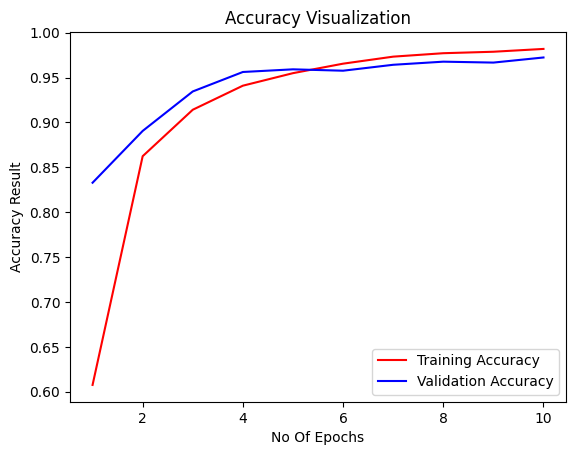

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No Of Epochs')
plt.ylabel('Accuracy Result')
plt.title("Accuracy Visualization")
plt.legend() # act as index  means it will show which colour in the graph is represnting what
plt.show()


##Some other metrices for model Evaluation

In [ ]:
class_names=vlidation_set.class_names
class_names #it will give the list of names of 38 class of plant used in the dataset

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    "/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
  )

Found 17572 files belonging to 38 classes.


###Performing Prediction

In [ ]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape  # (17572, 38)) it is reprsenting that it is giving output for  each of the class.i.e probability of image of each file of 38 class
#This means we have 17572 image of 38 class in validation set

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


(array([[1.0000000e+00, 1.1434347e-12, 5.8746336e-14, ..., 2.8746937e-23,
         1.1330159e-20, 7.7219637e-20],
        [9.9999833e-01, 6.5468990e-09, 1.5156391e-10, ..., 7.8805567e-14,
         1.7708034e-13, 9.4091033e-13],
        [1.0000000e+00, 1.2522236e-10, 4.2733474e-13, ..., 7.2758928e-21,
         3.5228423e-18, 2.6112843e-16],
        ...,
        [4.3075868e-12, 1.2252972e-12, 4.9157309e-09, ..., 1.5654977e-11,
         1.3720452e-12, 9.9999964e-01],
        [2.9581778e-11, 3.5110071e-11, 5.5073244e-08, ..., 4.0196473e-09,
         1.3363884e-10, 9.9999964e-01],
        [2.0772398e-17, 1.3141624e-18, 4.9482421e-17, ..., 1.1015863e-17,
         5.6637626e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
#Now our task is to find the maximum propaility for each row/class
#Here this argmax() will find the maximum value in y_pred and return the index of max value
predicted_categories=tf.argmax(y_pred,axis=1) #axis=1 means return the index in column wise mtlb ye pure row me se maximum value find karenga
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(  Y_true,predicted_categories,target_names=class_names))



                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.96      0.97       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.96      0.97      0.96       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.96      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

###Creating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix # importing confusion_matrix
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

In [ ]:
cm

array([[484,   5,   0, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 417, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 480]])

###confusion matrix visualisation

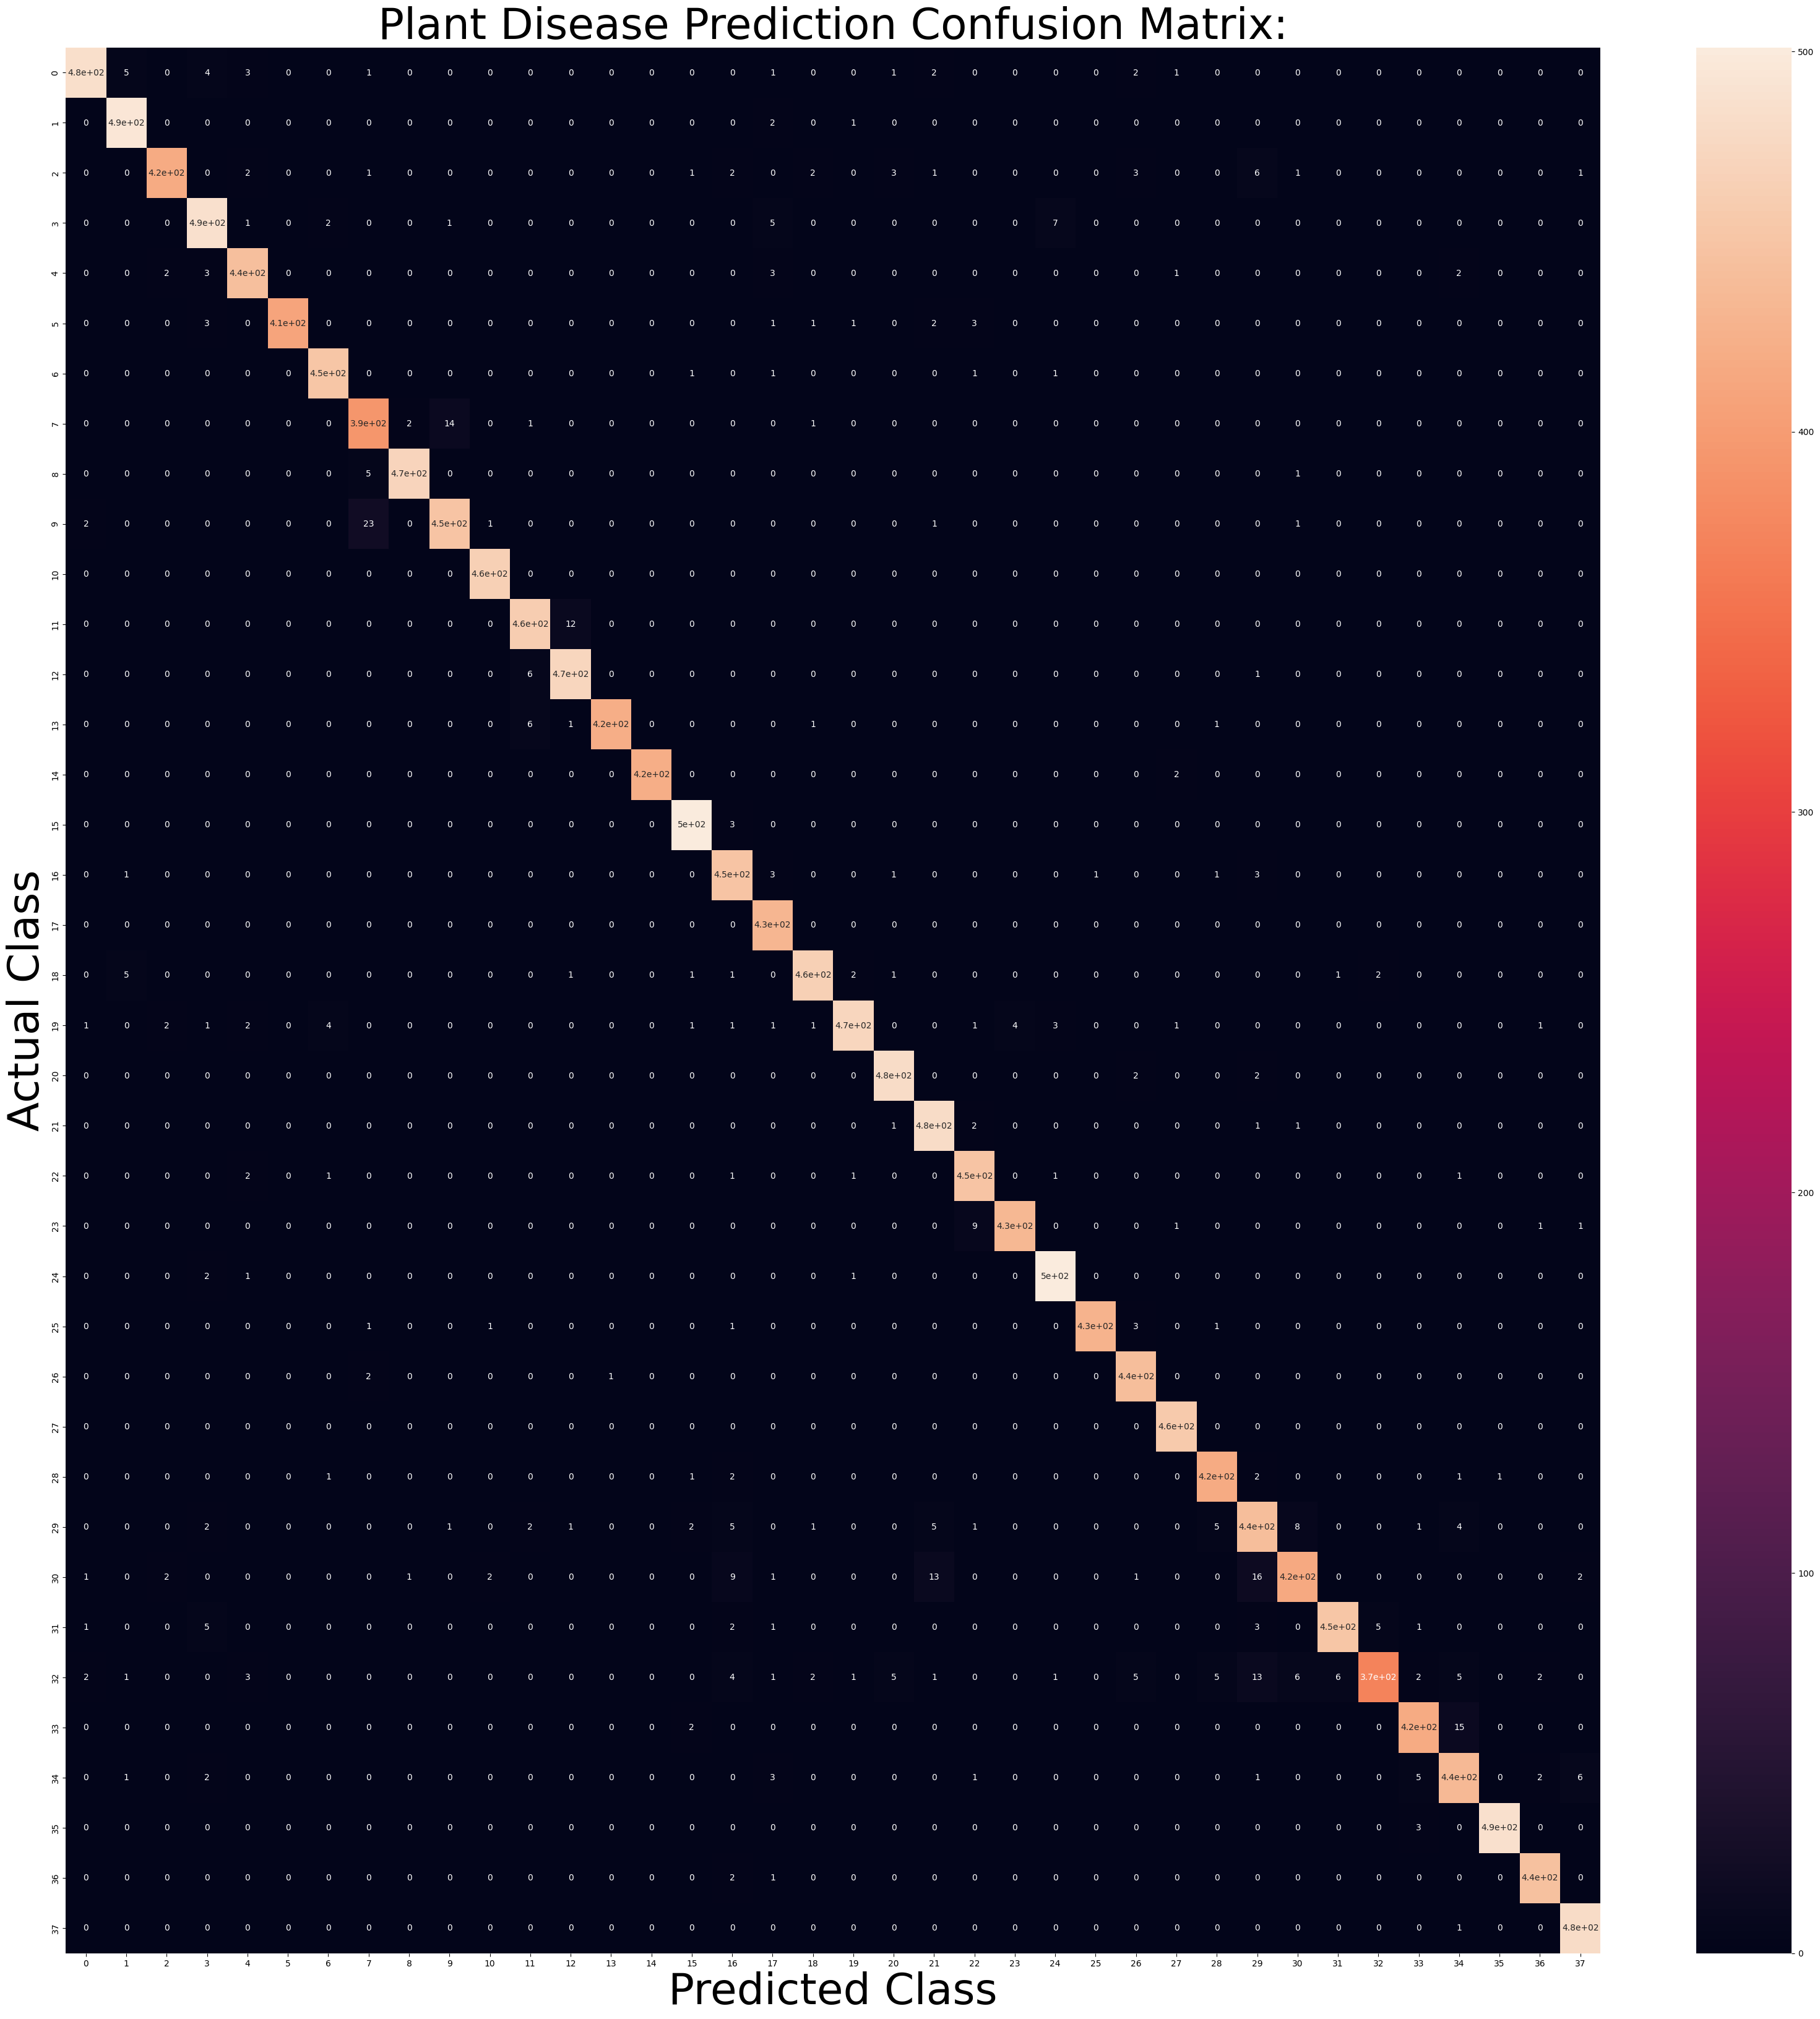

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=50)
plt.ylabel("Actual Class",fontsize=50)
plt.title("Plant Disease Prediction Confusion Matrix:",fontsize=50)
plt.show()